># Analyse Spatiale Descriptive
>## Setup

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

datasetDésaisonnalise = xr.open_dataset("../../data/processed/sstDeseasonalizedCOPERNICUS20102019.nc")
datasetBrut = xr.open_dataset("../../data/processed/sstCOPERNICUS20102019Processed.nc")
sstDésaisonnalise = datasetDésaisonnalise["analysed_sst"]
sstBrut = datasetBrut["analysed_sst"]


>## Cohérence géographique
>### A quoi sert la cohérence géographique ?
On calcule pour chaque pixel en fonction de la latitude et la longitude la variabilité dans le temps : écart-type temporel.

c:\Users\gaoks\Isen\ProjetM1\m1Project_SciML\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1992: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


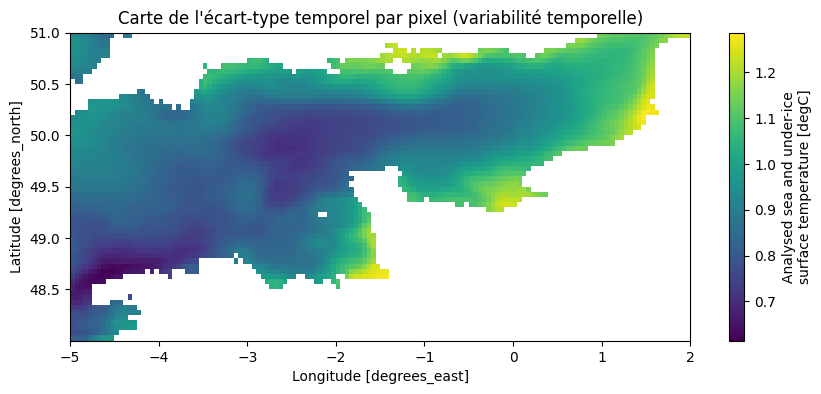

Std min / mean / max = 0.6145225167274475 0.9054909944534302 1.2862250804901123


In [16]:
std_map = sstDésaisonnalise.std("time", skipna=True)

plt.figure(figsize=(10,4))
std_map.plot()
plt.title("Carte de l'écart-type temporel par pixel (variabilité temporelle)")
plt.show()
print("Std min / mean / max =", float(std_map.min()), float(std_map.mean()), float(std_map.max()))


>### Comment interpréter nos résultats ?
On a calculé pour chaque pixel spatial l'écart-type temporel des anomalies de SST sur notre période étudiée.
Cet indicateur mesure l'intensité des fluctuations temporelles locales : si on obtient un écart-type faible la zone est stable dans le temps et si on obtient un écart-type fort la zone est plus variable ou instable.
Les résultats que nous obtenons sont 0.61°C pour le minimum, 1.29°C pour le maximum et 0.91°C pour la moyenne spatiale. Cela nous montre que la variabilité temporelle est significative partout mais non homogène spatialement avec un rapport d'environ 2 entre les zones les plus stables et les plus variables.
Sur notre carte on observe des zones de faible variabilité (environ 0.6 à 0.8°C) qui sont principalement dans certaines zones internes avec des couleurs sombres. Ces régions présentent une SST plus régulières dans le temps et sont donc probablement moins influencées par des processus dynamiques intenses ou des phénomènes locaux. On observe également des zones plus localisées en bordure de notre zone géographique. Ces régions représentent des zones qui subissent des fluctuations rapides qui peut être lié à des gradients thermiques, des zones d'échanges thermiques entre masse d'eau ou une sensibilité accrue aux forçages atmosphériques (voir Compendium partie Vocabulaire).
Pour conclure notre variabilité temporelle de la SST présente une ogranisation cohérente, les zones à forte variabilité ne sont pas distribuées aléatoirement, elles forment des structures à l'échelle régionale ce qui indique que la variabilité est contrôlée par des processus spatialisés et non pas du bruit local. Ainsi notre série temporelle n'est pas seulement variable elle est spatialement structurée.

>## Cartes de moyenne temporelle
>### Quel est l'objectif de cette analyse ?
L'objectif est de caractériser le niveau moyen spatial des anomalies et la dispersion temporelle associée à chaque pixel. Ces deux cartes permettent de distinguer la structure spatiale moyenne du champ et la variabilité temporelle locale
>### Comment réalise t-on les cartes ?
La carte de moyenne temporelle est calculée à partir de notre jeu de données brute pour représenter la répartition de la moyenne de la température à la surface de la Manche sur notre période étudiée.
La carte de variabilité temporelle est caractérisée à partir de l'écart-type temporel calculé grâce au jeu de données désaisonnalisé afin d'éviter le cycle saisonnier et d'isoler la variabilité résiduelle.

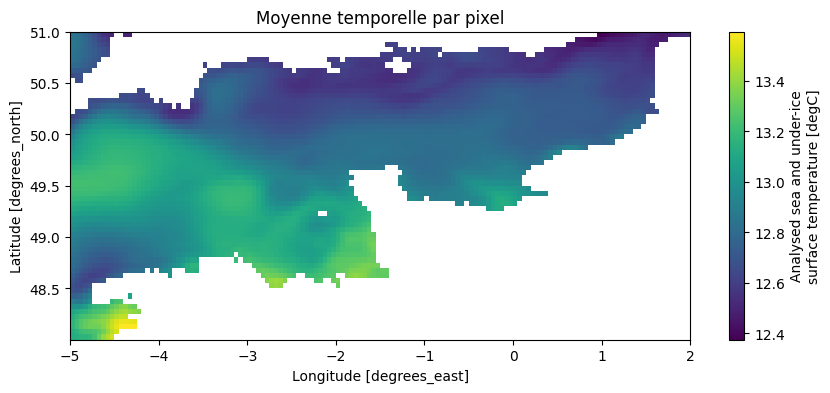

Moyenne spatiale de la moyenne = 12.862058639526367


In [17]:
mean_map = sstBrut.mean("time", skipna=True)

plt.figure(figsize=(10,4))
mean_map.plot()
plt.title("Moyenne temporelle par pixel")
plt.show()
print("Moyenne spatiale de la moyenne =", float(mean_map.mean()))


>### Comment interpréter nos résultats ?
Cette carte permet de mettre en évidence une structure spatiale cohérente et lissée du champ de SST. Les gradients spatiaux observés sont réguliers ce qui traduit une répartition thermique stable pour l'échelle temporelle considérée. On peut remarquer une similarité entre cette carte et la carte de variabilité temporelle ce qui signifie que notre moyenne temporelle lisse les fluctuations à court et moyen terme. Ainsi on a une structure spatiale moyenne globalement stable sur notre période et les variations interannuelles restent faibles.

>## Gradients spatiaux
>### A quoi servent les gradients spatiaux ?
L'objectif de l'analyse des gradients spatiaux est de mettre en évidence les zones avec des transitions thermiques, les fronts thermiques et les régions où le champ de SST a de fortes variations spatiales.
>### Comment réaliser cette analyse ?
Les gradients spatiaux sont calculés en utilisant la moyenne temporelle de la SST brute pour décrire la structure spatiale moyenne de notre champ thermique.
Les dérivées seront estimées numériquement selon la longitude et la latitude.
La magnitude est donnée par la formule suivante :
$$
|\nabla T| = \sqrt{\left(\frac{\theta T}{\theta x}\right)^2 + \left(\frac{\theta T}{\theta y}\right)^2}
$$

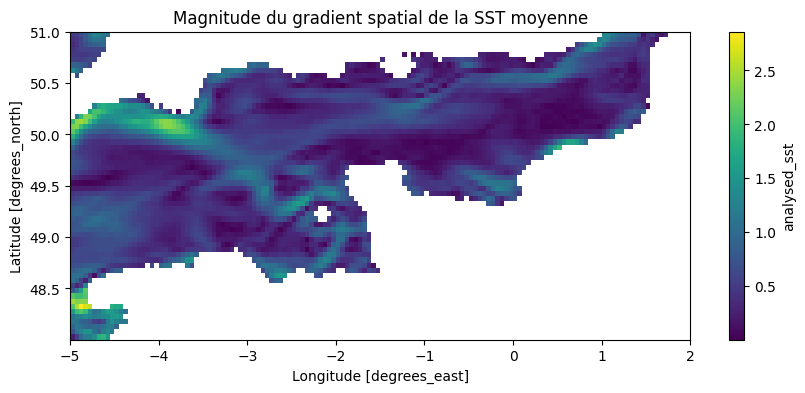

In [18]:
gradX = mean_map.differentiate("longitude")
gradY = mean_map.differentiate("latitude")
magnitudeGrad = np.sqrt(gradX**2 + gradY**2)

plt.figure(figsize=(10,4))
magnitudeGrad.plot()
plt.title("Magnitude du gradient spatial de la SST moyenne")
plt.show()


>### Comment exploiter nos résultats ?
La carte de magnitude du gradient spatial de la SST moyenne permet de voir la structure spatiale des variations thermiques, les gradients les plus élevés ne sont pas répartis aléatoirement mais forment des tracés continus à l'échelle de la structure. Ces zones correspondent à des zones où la température à la surface de la Manche varie rapidement.Au contraire de larges zones de la structure présentent des gradients plus faibles ce qui indique une SST spatialement plus homogène, ce qui montre une transition progressive de la température dans ces zones sans rupture spatiale marquée.

>## Anisotropie spatiale
>### Pourquoi réalise t-on l'anisotropie spatiale ?
Le but de l'analyse de l'anisotropie spatiale est de déterminer si les variations spatiales de la SST sont directionnelles :
- plutôt impactées par la longitude 
- ou plutôt impactées par la latitude
>### Comment réaliser l'anisotropie spatiale ?
On réutilise nos gradients spatiaux calculés avant :

$ g_{x} = \frac{\theta T}{\theta lon} $

$ g_{y} = \frac{\theta T}{\theta lat} $

Puis on définit notre indicateur global d'anisotropie :

$ A = \frac{\mathbb{E}(|g_{x}|)}{\mathbb{E}(|g_{y}|)} $

Cet indice nous permet de comparer l'intensité moyenne des variations spatiales de la SST en fonction des directions est-ouest et nord-sud :
- Si A est proche de 1 alors notre champ présente une anisotropie faible et aucune direction ne domine nettement
- Si A > 1 les variations spatiales sont en moyenne plus marquées selon la longitude (direction est-ouest)
- Si A < 1 les variations spatiales sont plus marquées par la latitude
Cet indice nous fournit une lecture globale mais ne donne pas la localisation des zones anisotropes.

Indice anisotropie A = mean(|d/dlon|) / mean(|d/dlat|) = 0.4649166166782379


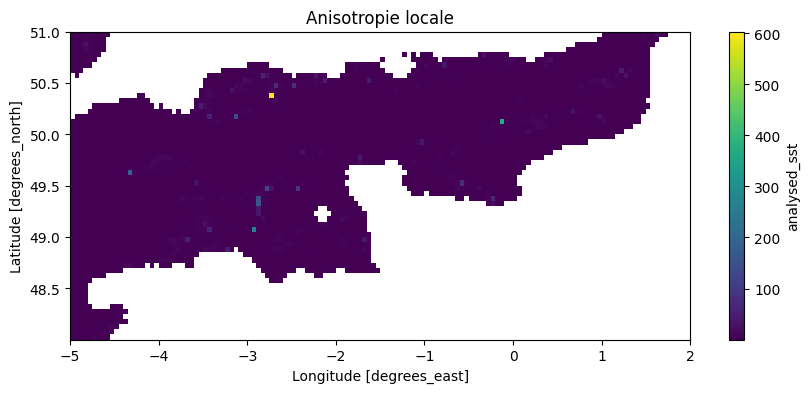

In [20]:
A = (np.abs(gradX).mean() / np.abs(gradY).mean()).item()
print("Indice anisotropie A = mean(|d/dlon|) / mean(|d/dlat|) =", A)
anisotropieCarte = (np.abs(gradX) + 1e-12) / (np.abs(gradY) + 1e-12)

plt.figure(figsize=(10,4))
anisotropieCarte.plot()
plt.title("Anisotropie locale")
plt.show()


>### Comment exploiter les résultats obtenus ?
L'indice global d'anisotropie qu'on obtient est égal à 0.46 ce qui signifie qu'en moyenne les variations spatiales de la SST seront plus marquées selon la direction nord-sud que par la direction est-ouest. Ainsi le champ de SST présente une anisotropie globale dominée par les gradients de latitude.
La carte d'anisotropie locale montre que la majorité de la zone présente des valeurs faibles pour notre ratio ce qui confirme la prédominance des variations selon la latitude. On observe des valeurs très élevées ponctuellement qui correspondent à des zones où le gradient nord-sud est faible ce qui entraînement par conséquence un ratio élevé, ces valeurs extrêmes sont liées à des effets locaux.
Pour conclure la dominance globale des gradients de latitude est cohérente avec notre répartition thermique puisque la SST varie principalement en fonction de la latitude. Cette anisotropie nous confirme la stabilité du champ thermique tout en apportant une information directionnellle pour mieux comprendre l'organisation du champ de la SST.